In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import missingno as msno

%matplotlib inline
sns.set(style='whitegrid')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [3]:
raw = pd.read_csv('./data/일별농업기상_20150701_20210908.csv',encoding='cp949')

In [4]:
raw.columns

Index(['Unnamed: 0', 'no', 'stn_Code', 'stn_Name', 'date', 'temp', 'max_Temp',
       'min_Temp', 'hum', 'widdir', 'wind', 'rain', 'sun_Time', 'sun_Qy',
       'condens_Time', 'gr_Temp', 'soil_Temp', 'soil_Wt'],
      dtype='object')

In [5]:
def change_columns_name(df):
    df.rename(columns = {'stn_Code' : '관측지점코드',
                            'stn_Name' : '관측지점명',
                            'date' : '관측시각',
                            'temp' : '기온',
                            'max_Temp' : '최고기온',
                            'min_Temp' : '최저기온',
                            'hum' : '습도',
                            'widdir' : '풍향',
                            'wind' : '풍속',
                            'rain' : '강수량',
                            'sun_Time' : '일조시간',
                            'sun_Qy' : '일사량',
                            'condens_Time' : '결로시간',
                            'gr_Temp' : '초상온도',
                            'soil_Temp' : '지중온도',
                            'soil_Wt' : '토양수분보정값'
                            }, inplace = True)
def pick_columns(df):
    df.drop(['Unnamed: 0','no','관측지점코드'],axis=1,inplace=True)

In [6]:
change_columns_name(raw)
pick_columns(raw)

In [7]:
raw.describe()

,기온,최고기온,최저기온,습도,풍향,풍속,강수량,일조시간,일사량,결로시간,초상온도,지중온도,토양수분보정값
count,57106.000000,57103.000000,57105.000000,56612.000000,54111.000000,55784.000000,57121.000000,48931.000000,55632.000000,54068.000000,36874.000000,50809.000000,38919.000000
mean,13.144689,19.142133,7.948061,73.795489,185.910345,0.980023,3.509342,351.543541,14.542305,273.580935,13.157287,14.602045,23.600912
std,10.154925,10.240755,10.764973,14.330042,85.395242,0.794432,15.175135,224.479130,8.780271,404.579756,11.070499,9.931635,11.662608
min,-49.400000,-45.200000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.400000,-45.200000,-109.400000
25%,4.700000,10.800000,-0.900000,64.700000,116.700000,0.400000,0.000000,146.000000,8.000000,0.000000,3.900000,6.200000,17.300000
50%,14.000000,20.700000,8.100000,75.700000,194.300000,0.800000,0.000000,391.000000,13.300000,1.000000,13.950000,15.500000,24.500000
75%,22.000000,27.700000,17.600000,84.300000,249.700000,1.300000,0.500000,533.000000,20.000000,483.000000,22.600000,23.000000,30.000000
max,49.500000,50.000000,45.000000,100.000000,360.000000,7.600000,500.000000,1139.000000,40.000000,1440.000000,49.900000,49.900000,50.000000


In [8]:
raw.isnull().sum()

관측지점명          0
관측시각           0
기온          1814
최고기온        1817
최저기온        1815
습도          2308
풍향          4809
풍속          3136
강수량         1799
일조시간        9989
일사량         3288
결로시간        4852
초상온도       22046
지중온도        8111
토양수분보정값    20001
dtype: int64

In [9]:
df = raw.copy()

In [10]:
df['관측시각'] = pd.to_datetime(df['관측시각'], format="%Y-%m-%d")
df['연도'] = df['관측시각'].dt.year
df['월'] = df['관측시각'].dt.month
df['일'] = df['관측시각'].dt.day

## 결측치 확인

In [11]:
nan_df = df.copy()
nan_df.drop(['관측지점명','연도','월','일'],axis=1,inplace=True)

In [12]:
for col in nan_df.columns: 
    MissingPercent = '{:<10}\t 결측치 비율: {:.2f}%'.format(col, 100 * (nan_df[col].isnull().sum() / nan_df[col].shape[0])) 
    print(MissingPercent)

관측시각      	 결측치 비율: 0.00%
기온        	 결측치 비율: 3.08%
최고기온      	 결측치 비율: 3.08%
최저기온      	 결측치 비율: 3.08%
습도        	 결측치 비율: 3.92%
풍향        	 결측치 비율: 8.16%
풍속        	 결측치 비율: 5.32%
강수량       	 결측치 비율: 3.05%
일조시간      	 결측치 비율: 16.95%
일사량       	 결측치 비율: 5.58%
결로시간      	 결측치 비율: 8.23%
초상온도      	 결측치 비율: 37.42%
지중온도      	 결측치 비율: 13.77%
토양수분보정값   	 결측치 비율: 33.95%


<AxesSubplot:>

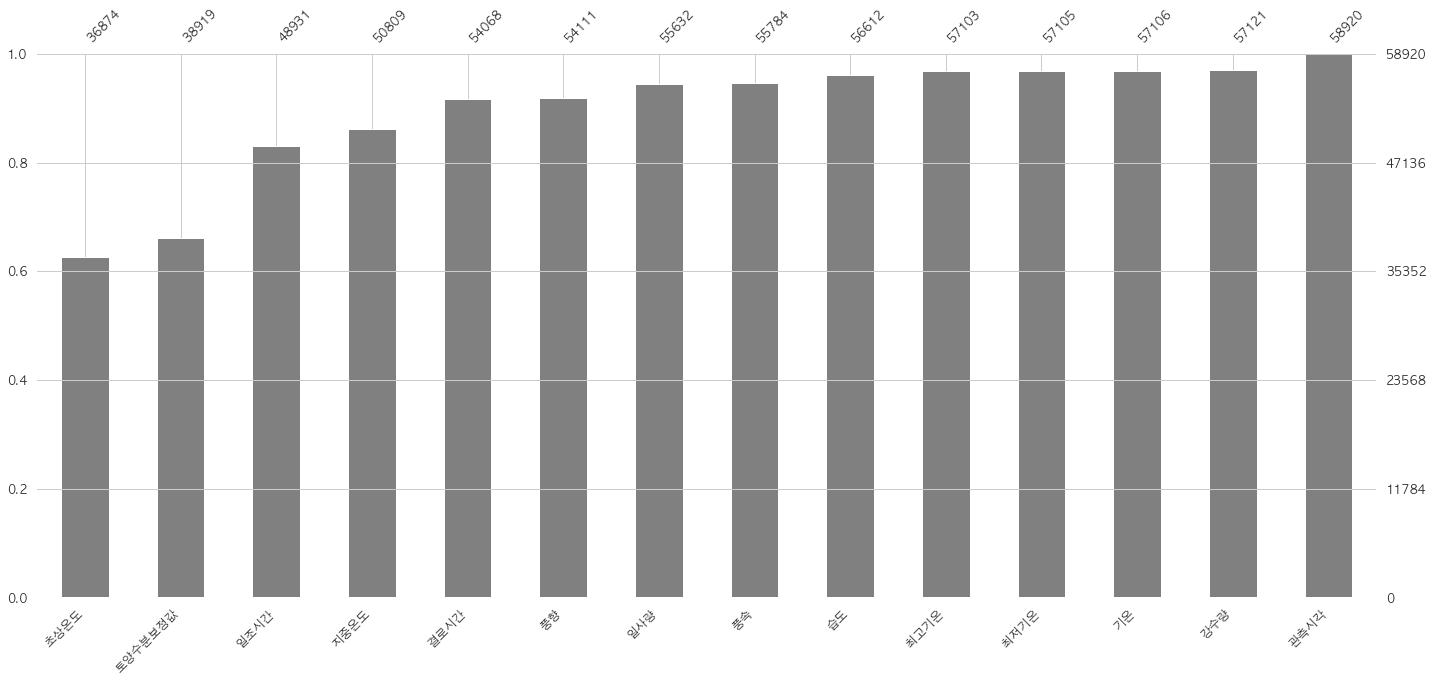

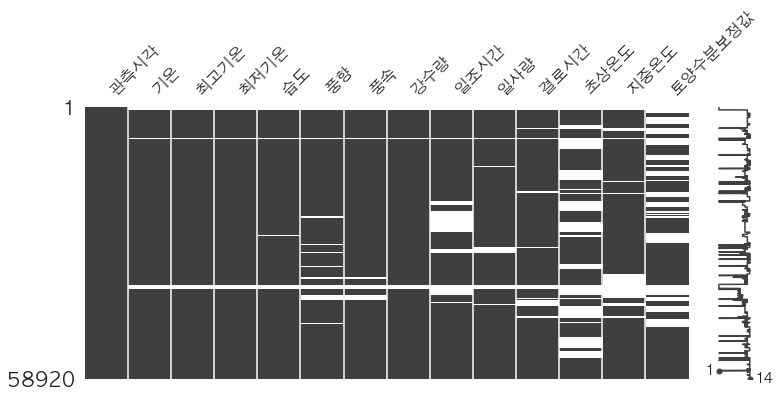

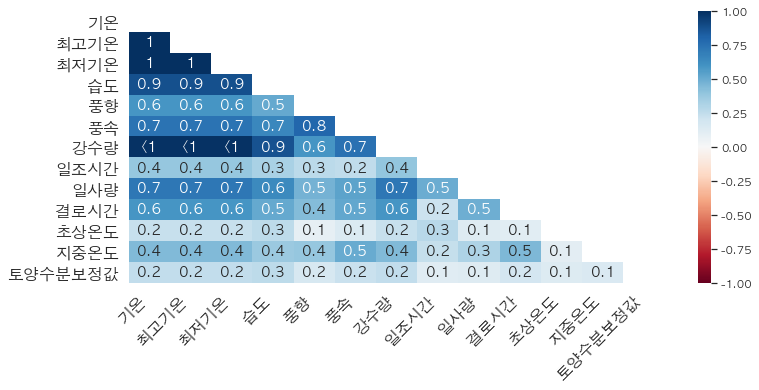

In [13]:
plt.figure(figsize=(10,4))
ax = msno.bar(nan_df,color="grey",sort="ascending",fontsize=12)
#ax.figure.savefig('[최종]결측치값.png',dpi=150,transparent=True)
msno.matrix(nan_df,figsize=(12,5))
msno.heatmap(nan_df,figsize=(12,5))

In [18]:
df_temp = df.copy()

In [19]:
df_temp = df_temp[(df_temp['관측지점명'] == '진도군 군내면')|
(df_temp['관측지점명'] == '신안군 압해읍')|
(df_temp['관측지점명'] == '부산시 강서구')|
(df_temp['관측지점명'] == '김해시 전하동')|
(df_temp['관측지점명'] == '평창군 여만리')|
(df_temp['관측지점명'] == '횡성군 공근면')|
(df_temp['관측지점명'] == '남양주 진건읍')|
(df_temp['관측지점명'] == '이천시 중리동')
]

In [20]:
feature_list = ['기온','최고기온','최저기온','습도','풍향','풍속','강수량','일조시간','일사량','결로시간','초상온도','지중온도','토양수분보정값']

In [21]:
df_temp[feature_list].describe()

,기온,최고기온,최저기온,습도,풍향,풍속,강수량,일조시간,일사량,결로시간,초상온도,지중온도,토양수분보정값
count,18072.000000,18072.000000,18072.000000,18005.000000,17652.000000,18087.000000,18079.000000,14852.000000,18058.000000,17780.000000,8415.000000,17564.000000,13824.000000
mean,13.430738,19.385220,8.307481,71.880194,185.964151,1.175723,4.206510,349.290803,13.955416,324.923960,11.618954,15.263066,20.112630
std,9.995905,9.933462,10.672380,16.100214,77.520131,0.943288,20.562081,223.016613,7.643968,445.709871,12.444850,9.256007,9.498093
min,-39.900000,-39.700000,-46.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.400000,-11.100000,-13.600000
25%,5.400000,11.500000,-0.300000,62.100000,134.400000,0.500000,0.000000,149.000000,8.000000,0.000000,1.200000,6.900000,13.600000
50%,14.450000,20.800000,8.700000,74.200000,193.400000,0.900000,0.000000,381.000000,13.000000,28.000000,12.600000,16.950000,20.900000
75%,21.900000,27.525000,17.700000,83.500000,242.500000,1.600000,0.500000,533.000000,19.300000,569.000000,22.000000,22.400000,27.000000
max,33.100000,42.600000,27.900000,99.900000,360.000000,7.600000,500.000000,826.000000,40.000000,1440.000000,46.800000,49.900000,50.000000


In [22]:
for i in [5,6,7,8,9]: # 여름
    print(i)
    temp_ds = \
        df_temp.loc[
            df_temp['월'] == i
        ].copy()
    temp_ds['기온'] = temp_ds['기온'].apply(lambda x: np.NaN if (x <= 0) else x)
    temp_index = temp_ds.index
    df_temp.loc[temp_index, "기온"] = temp_ds['기온']


5
6
7
8
9


In [23]:
for i in [11,12,1,2]: # 겨울
    print(i)
    temp_ds = \
        df_temp.loc[
            df_temp['월'] == i
        ].copy()
    temp_ds['기온'] = temp_ds['기온'].apply(lambda x: np.NaN if (x <= -25) |(x > 20) else x)
    temp_index = temp_ds.index
    df_temp.loc[temp_index, "기온"] = temp_ds['기온']

11
12
1
2


In [26]:
df_temp.isna().sum()

관측지점명         0
관측시각          0
기온           52
최고기온         31
최저기온         31
습도           98
풍향          451
풍속           16
강수량          24
일조시간       3251
일사량          45
결로시간        323
초상온도       9688
지중온도        539
토양수분보정값    4279
연도            0
월             0
일             0
dtype: int64

In [27]:
df_final = df_temp.copy()

In [28]:
def change_new(df, feature_list, loca_list):
    ds = df.copy()
    new_ds = pd.DataFrame()
    na_count = 0 # 결측치 처리 개수
    total_na = 0 # 결측치 처리 전 결측치 개수
    for loca_l in loca_list:
        main_ds = ds[ds["관측지점명"] == loca_l[0]].copy()
        sub_ds = ds[ds["관측지점명"] == loca_l[1]].copy()
        
        # 관측시각이 중복되는 행을 삭제함
        main_before = len(main_ds)
        main_ds.drop_duplicates(['관측시각'], inplace=True)
        main_after = len(main_ds)
        print(f"관측시각이 중복되는 값 {main_after - main_before}개 삭제")
        sub_ds.drop_duplicates(['관측시각'], inplace=True)
        
        for feature in feature_list:
            before_na = len(main_ds.loc[main_ds[feature].isna()])
            temp_dates = \
                main_ds.loc[main_ds[feature].isna(), '관측시각'].astype('str').values.tolist()
            total_na += len(temp_dates)
            for date in temp_dates:
                temp_change = sub_ds.loc[sub_ds['관측시각'] == date, feature].values
                main_ds.loc[main_ds['관측시각'] == date, feature] = temp_change
            after_na = len(main_ds.loc[main_ds[feature].isna()])
            change_na = before_na - after_na
            na_count += change_na
            if change_na == 0:
                print(f"{feature} -> 변경 불가!!!, 잔여na: {after_na}개")
            else:
                print(f"{feature} -> 변경 완료: {change_na}개, 잔여na: {after_na}개")
        new_ds = new_ds.append(main_ds)

    print(f"결측치 처리 전 결측치 개수: {total_na}개")
    print(f"총 결측치 처리 완료 개수: {na_count}개")
    return new_ds

In [29]:
loca_list = [
    ['진도군 군내면', '신안군 압해읍'], 
    ['부산시 강서구', '김해시 전하동'], 
    ['평창군 여만리', '횡성군 공근면'], 
    ['남양주 진건읍', '이천시 중리동']
]
df_final_final = change_new(df_final, feature_list, loca_list)

관측시각이 중복되는 값 0개 삭제
기온 -> 변경 완료: 2개, 잔여na: 1개
최고기온 -> 변경 완료: 2개, 잔여na: 0개
최저기온 -> 변경 완료: 2개, 잔여na: 0개
습도 -> 변경 완료: 2개, 잔여na: 0개
풍향 -> 변경 완료: 10개, 잔여na: 0개
풍속 -> 변경 완료: 2개, 잔여na: 0개
강수량 -> 변경 완료: 10개, 잔여na: 0개
일조시간 -> 변경 불가!!!, 잔여na: 2개
일사량 -> 변경 완료: 2개, 잔여na: 0개
결로시간 -> 변경 완료: 2개, 잔여na: 0개
초상온도 -> 변경 불가!!!, 잔여na: 2256개
지중온도 -> 변경 완료: 5개, 잔여na: 0개
토양수분보정값 -> 변경 완료: 28개, 잔여na: 0개
관측시각이 중복되는 값 -10개 삭제
기온 -> 변경 완료: 3개, 잔여na: 0개
최고기온 -> 변경 완료: 3개, 잔여na: 0개
최저기온 -> 변경 완료: 3개, 잔여na: 0개
습도 -> 변경 완료: 70개, 잔여na: 0개
풍향 -> 변경 완료: 200개, 잔여na: 0개
풍속 -> 변경 완료: 3개, 잔여na: 0개
강수량 -> 변경 완료: 3개, 잔여na: 0개
일조시간 -> 변경 완료: 951개, 잔여na: 0개
일사량 -> 변경 완료: 3개, 잔여na: 0개
결로시간 -> 변경 완료: 3개, 잔여na: 0개
초상온도 -> 변경 불가!!!, 잔여na: 2260개
지중온도 -> 변경 완료: 3개, 잔여na: 0개
토양수분보정값 -> 변경 완료: 3개, 잔여na: 1141개
관측시각이 중복되는 값 -1개 삭제
기온 -> 변경 완료: 3개, 잔여na: 0개
최고기온 -> 변경 완료: 3개, 잔여na: 0개
최저기온 -> 변경 완료: 3개, 잔여na: 0개
습도 -> 변경 완료: 3개, 잔여na: 0개
풍향 -> 변경 완료: 8개, 잔여na: 0개
풍속 -> 변경 완료: 3개, 잔여na: 0개
강수량 -> 변경 완료: 3개, 잔여na: 0개
일조시간 -> 변경 완료: 3개, 잔여na: 

In [ ]:
df_final_final.to_csv('./data/[결측치처리]기상데이터.csv') 

## 결측치, 이상치 처리 후 데이터 분포 그래프

In [37]:
df = df_final_final.copy()
df_2020 = df[df['연도'] != 2021]

In [39]:
df['관측지점명'] = df['관측지점명'].map({'남양주 진건읍':'경인',
                             '부산시 강서구':'부울경',
                             '진도군 군내면':'전남',
                             '평창군 여만리':'강원'})

# df['관측지점명'] = df['관측지점명'].map({'남양주 진건읍':'경기도(구리+)',
#                              '부산시 강서구':'경상남도(부산+)',
#                              '진도군 군내면':'전라남도(진도+)',
#                              '평창군 여만리':'강원도(평창+)'})

df_2020['관측지점명'] = df_2020['관측지점명'].map({'남양주 진건읍':'경인',
'부산시 강서구':'부울경',
'진도군 군내면':'전남',
'평창군 여만리':'강원'})

<ipython-input-39-701b5963708c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['관측지점명'] = df_2020['관측지점명'].map({'남양주 진건읍':'경인',


In [40]:
feature_list = ['기온','최고기온','최저기온','습도','풍속','강수량','일조시간','일사량','결로시간']

### 2015년부터 2020년도까지 각 feature별 데이터 분포

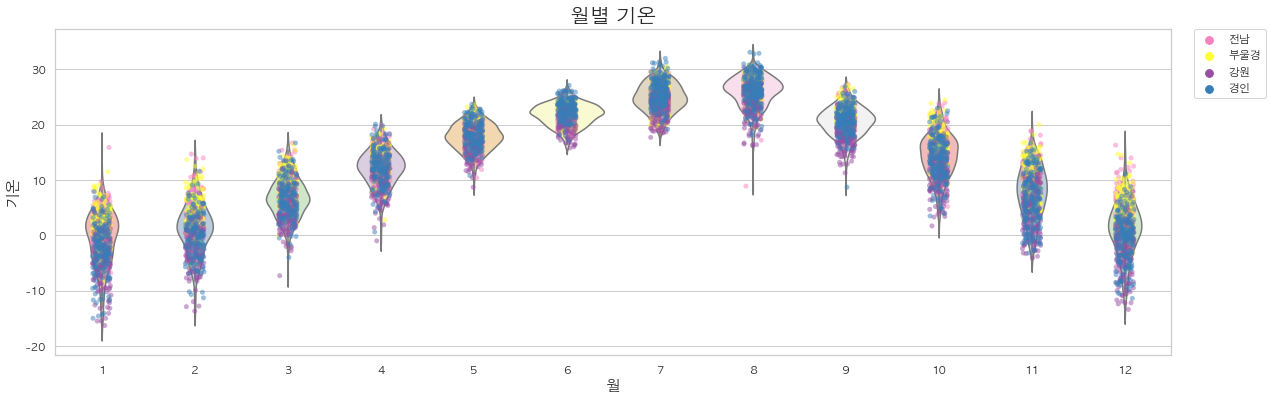

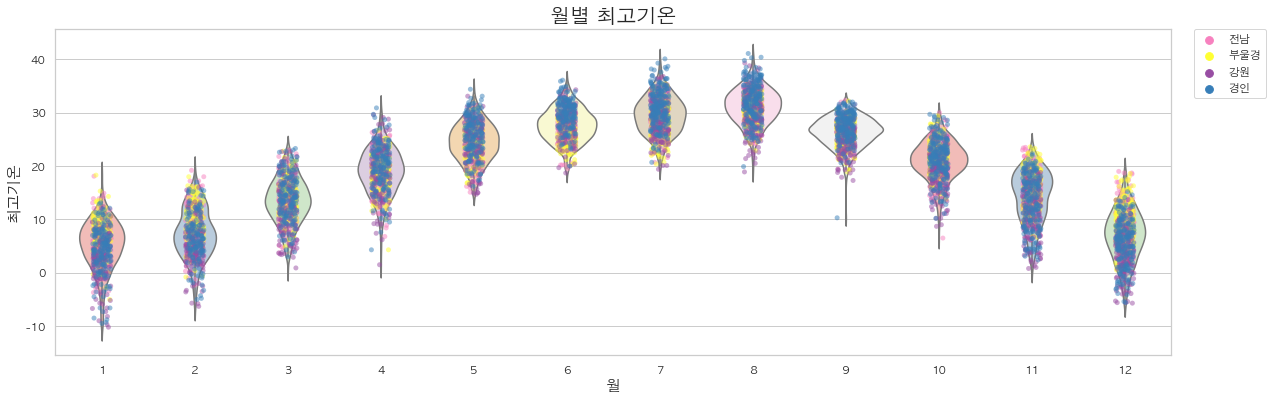

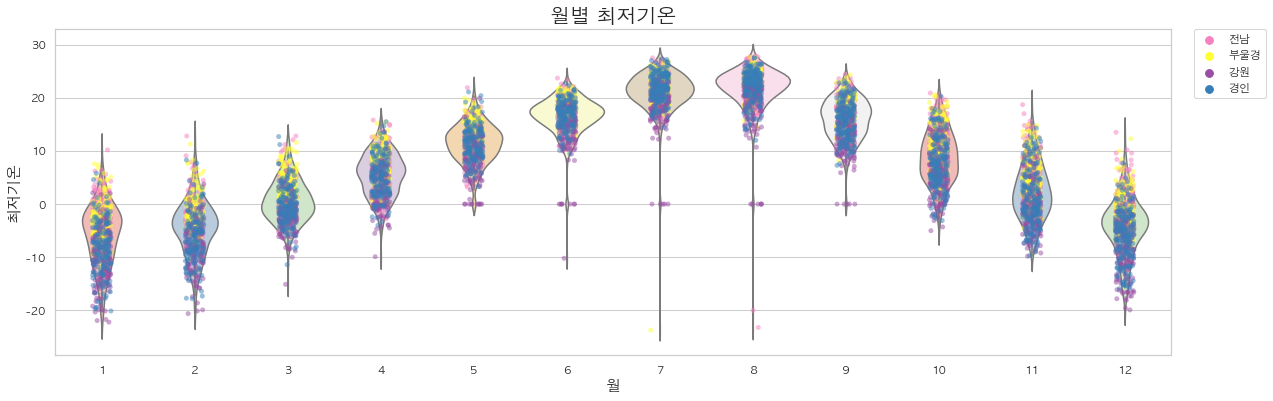

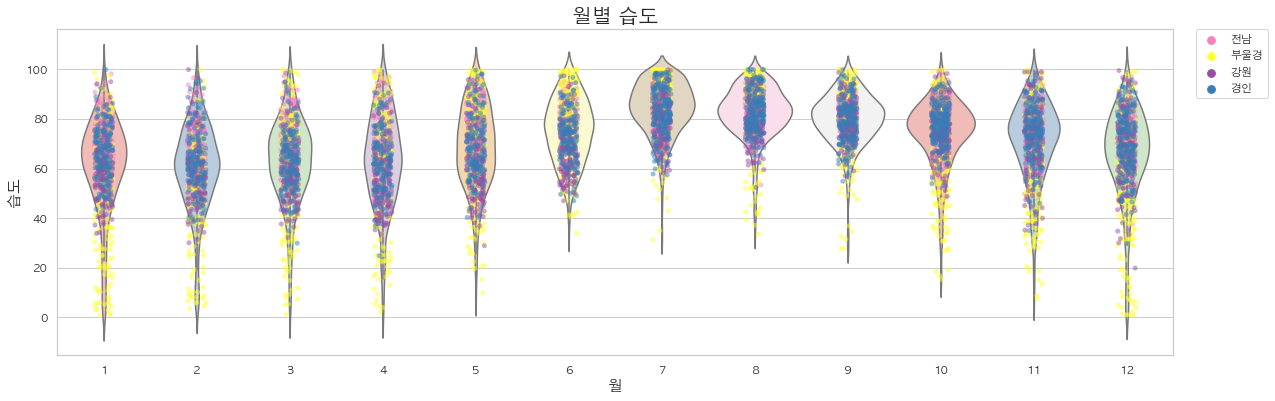

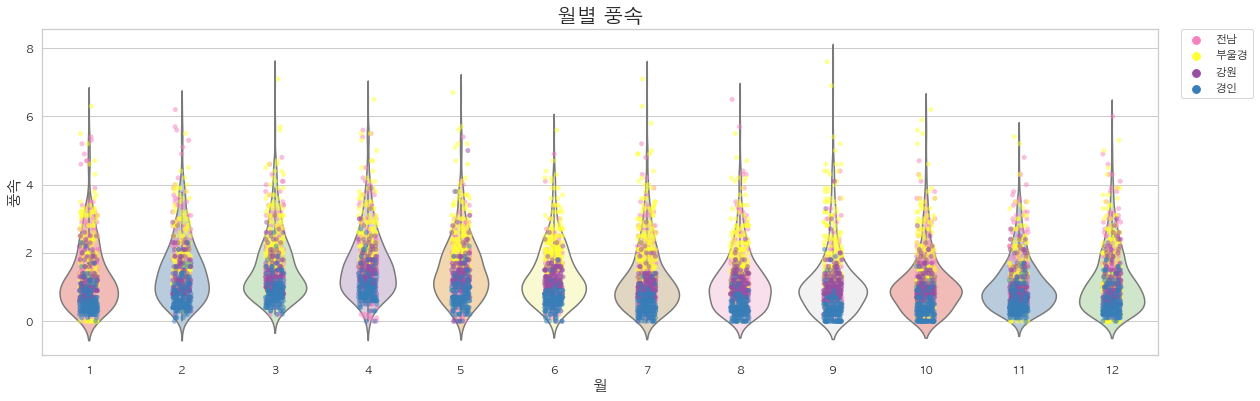

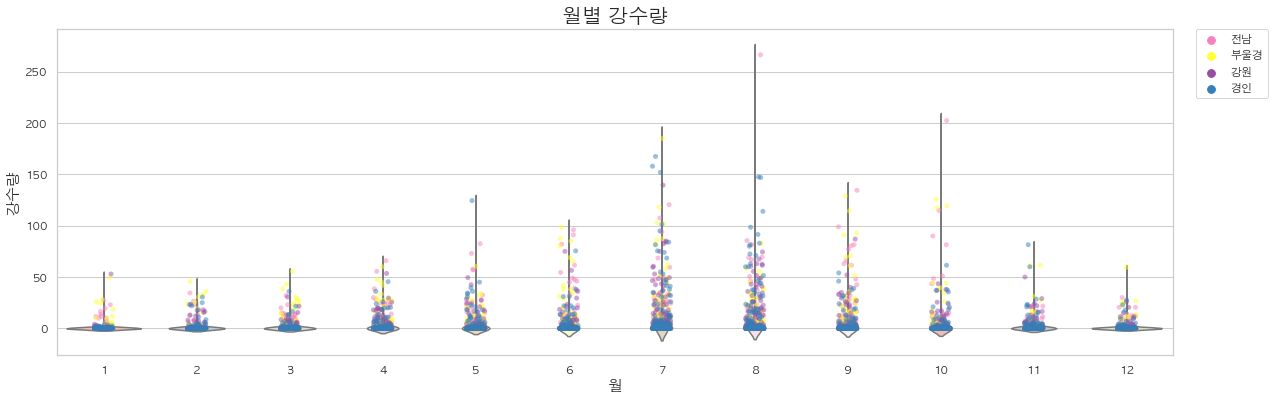

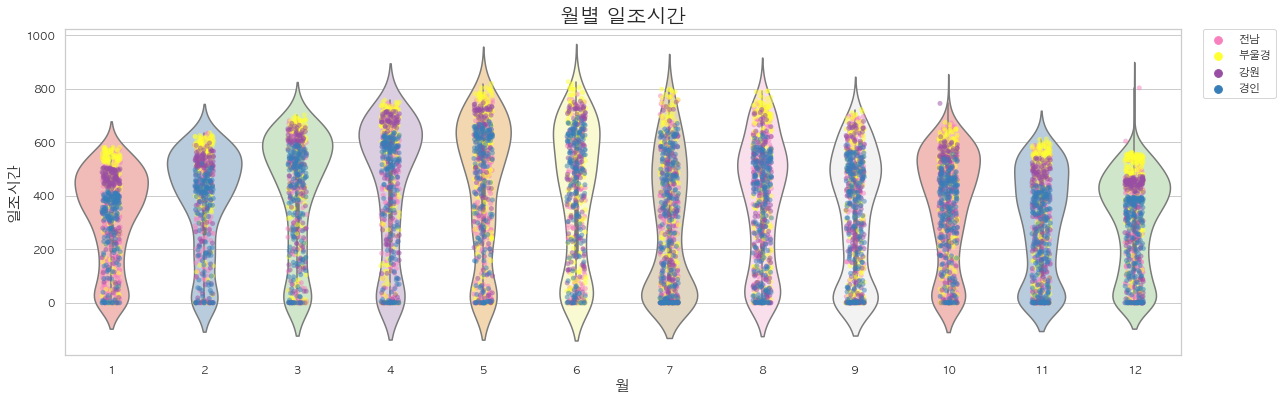

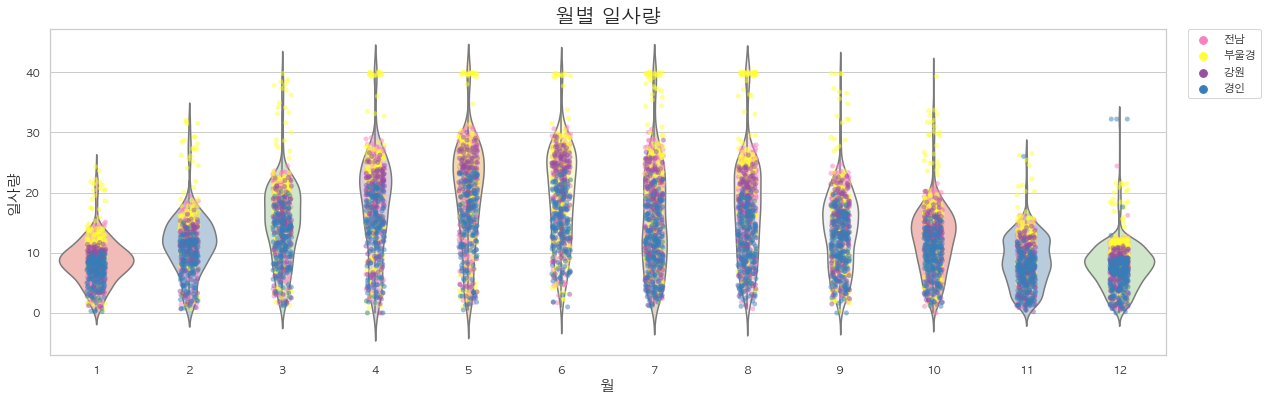

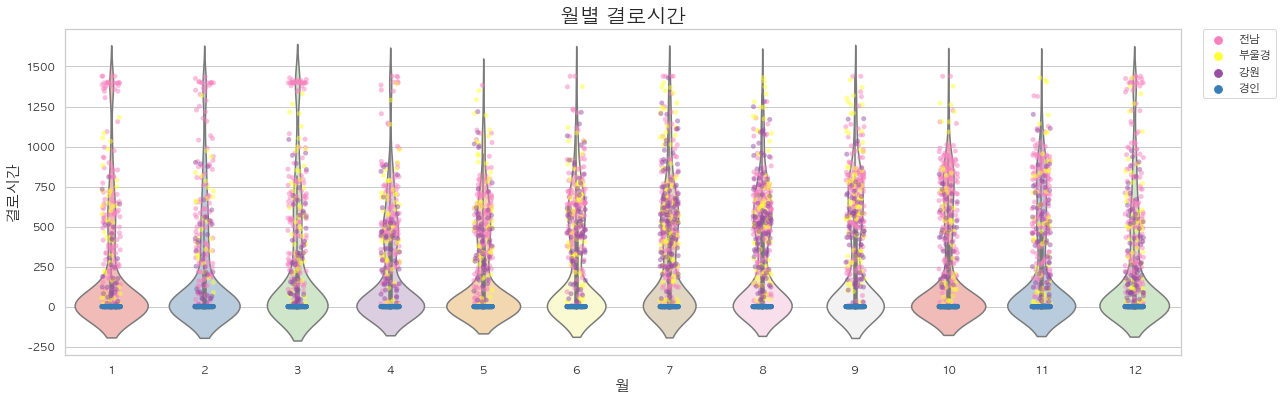

In [47]:
for feature in feature_list:
    plt.figure(figsize=(20,6))
    ax = sns.violinplot(x = '월',y = feature,data = df_2020,palette='Pastel1')
    ax = sns.stripplot(x = '월',y = feature,data = df_2020,hue='관측지점명',palette='Set1_r',jitter=.1,alpha=.5)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title('월별 ' + feature,fontsize=20)
    plt.xlabel('월',fontsize=15)
    plt.ylabel(feature,fontsize=15)
    plt.show()
    #ax.figure.savefig('[이상치제거]지역별 월별 {}.png' .format(feature),dpi=150,transparent=True)